<a href="https://colab.research.google.com/github/JenariusGanlary/sales_forcasting/blob/main/sales_forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

**Load the dataset**

In [3]:
store_sales = pd.read_csv("updated_train.csv")
store_sales.head(10)

,date,store,item,sales
0,2020-01-01,1,1,13
1,2020-02-01,1,1,11
2,2020-03-01,1,1,14
3,2020-04-01,1,1,13
4,2020-05-01,1,1,10
5,2020-06-01,1,1,12
6,2020-07-01,1,1,10
7,2020-08-01,1,1,9
8,2020-09-01,1,1,12
9,2020-10-01,1,1,9


**Check for the null value in the dataset**

In [4]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    65532 non-null  object
 1   store   65532 non-null  int64 
 2   item    65532 non-null  int64 
 3   sales   65532 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ MB


**Dropping store and items columns because we need only date and sales data.**

In [5]:
stores_sales = store_sales.drop(['store','item'], axis=1)

In [6]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    65532 non-null  object
 1   store   65532 non-null  int64 
 2   item    65532 non-null  int64 
 3   sales   65532 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ MB


**Dropping store and item columns**

In [7]:
store_sales = store_sales.drop(['store', 'item'], axis=1)

In [8]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    65532 non-null  object
 1   sales   65532 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


**Converting date from object datatype to dateTime datatype**

In [9]:
store_sales['date'] = pd.to_datetime(store_sales['date'])

In [10]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    65532 non-null  datetime64[ns]
 1   sales   65532 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 MB


**Converting date to a month period, and then sum the number of items in each month**

In [11]:
store_sales['date'] = store_sales['date'].dt.to_period("M")
monthly_sales = store_sales.groupby('date').sum().reset_index()

**Convert the resulting date column to timestamp datatype**

In [12]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

In [13]:
monthly_sales.head(10)

,date,sales
0,2020-01-01,26678
1,2020-02-01,26293
2,2020-03-01,32065
3,2020-04-01,33234
4,2020-05-01,36192
5,2020-06-01,36857
6,2020-07-01,39552
7,2020-08-01,36289
8,2020-09-01,33581
9,2020-10-01,32966


**Visualization**

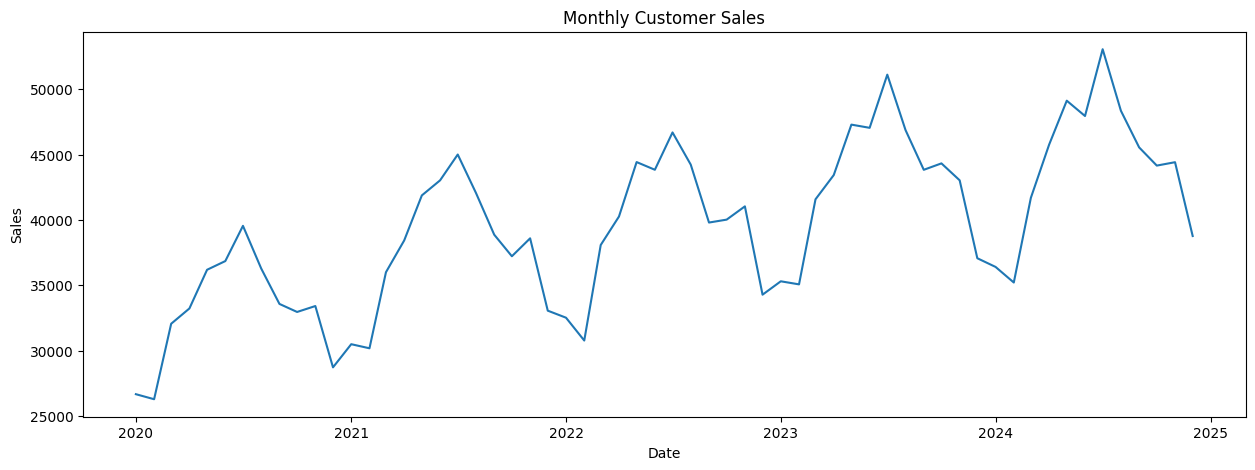

In [15]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Customer Sales")
plt.show()


**call the difference on the sales column to make the sales data stationary**

In [16]:
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.head(10)

,date,sales,sales_diff
1,2020-02-01,26293,-385.0
2,2020-03-01,32065,5772.0
3,2020-04-01,33234,1169.0
4,2020-05-01,36192,2958.0
5,2020-06-01,36857,665.0
6,2020-07-01,39552,2695.0
7,2020-08-01,36289,-3263.0
8,2020-09-01,33581,-2708.0
9,2020-10-01,32966,-615.0
10,2020-11-01,33419,453.0


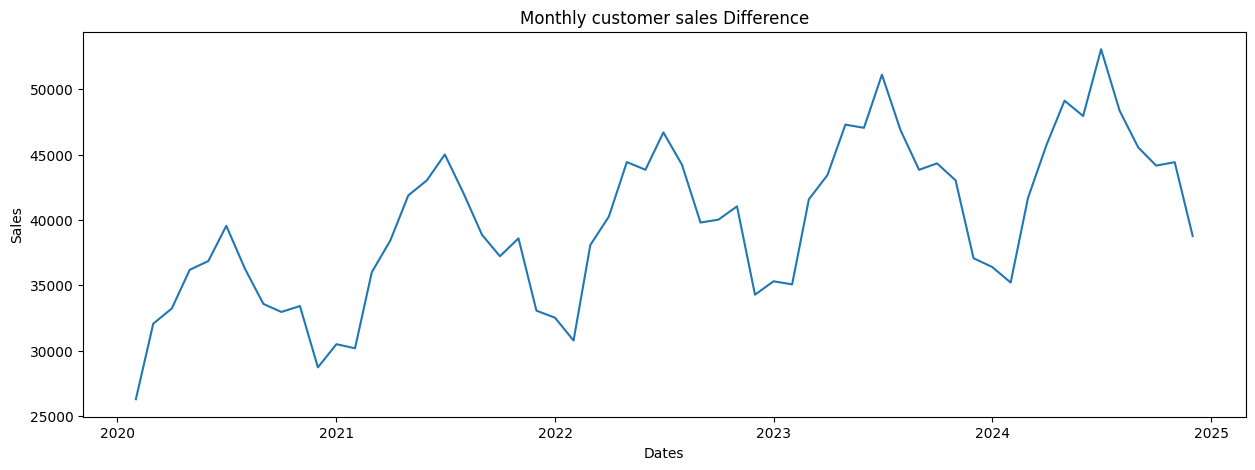

In [17]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.xlabel("Dates")
plt.ylabel("Sales")
plt.title("Monthly customer sales Difference")
plt.show()

**Dropping of sales and date**

In [18]:
supervised_data = monthly_sales.drop(['date','sales'], axis = 1)

**Prepearing the supervised data**

In [19]:
for i in range(1,13):
  col_name = 'month_' + str(i)
  supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-313.0,1771.0,-4689.0,453.0,-615.0,-2708.0,-3263.0,2695.0,665.0,2958.0,1169.0,5772.0,-385.0
1,5816.0,-313.0,1771.0,-4689.0,453.0,-615.0,-2708.0,-3263.0,2695.0,665.0,2958.0,1169.0,5772.0
2,2431.0,5816.0,-313.0,1771.0,-4689.0,453.0,-615.0,-2708.0,-3263.0,2695.0,665.0,2958.0,1169.0
3,3444.0,2431.0,5816.0,-313.0,1771.0,-4689.0,453.0,-615.0,-2708.0,-3263.0,2695.0,665.0,2958.0
4,1152.0,3444.0,2431.0,5816.0,-313.0,1771.0,-4689.0,453.0,-615.0,-2708.0,-3263.0,2695.0,665.0
5,1975.0,1152.0,3444.0,2431.0,5816.0,-313.0,1771.0,-4689.0,453.0,-615.0,-2708.0,-3263.0,2695.0
6,-2941.0,1975.0,1152.0,3444.0,2431.0,5816.0,-313.0,1771.0,-4689.0,453.0,-615.0,-2708.0,-3263.0
7,-3190.0,-2941.0,1975.0,1152.0,3444.0,2431.0,5816.0,-313.0,1771.0,-4689.0,453.0,-615.0,-2708.0
8,-1649.0,-3190.0,-2941.0,1975.0,1152.0,3444.0,2431.0,5816.0,-313.0,1771.0,-4689.0,453.0,-615.0
9,1371.0,-1649.0,-3190.0,-2941.0,1975.0,1152.0,3444.0,2431.0,5816.0,-313.0,1771.0,-4689.0,453.0


**Split the data into Train and Test**

In [20]:
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]
print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)

Train Data Shape:  (35, 13)
Test Data Shape:  (12, 13)


**Scaling features**

In [21]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


**Splitting data into input and output**

In [22]:
x_train, y_train = train_data[:,1:], train_data[:,0:1]
x_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)


x_train shape:  (35, 12)
y_train shape:  (35,)
x_test shape:  (12, 12)
y_test shape:  (12,)


Make a prediction dataframe to merge the predicted sales of all trained algorithm

In [23]:
sales_dates = monthly_sales['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [24]:
act_sales = monthly_sales['sales'][-13:].to_list()
print(act_sales)

[37074, 36410, 35217, 41695, 45759, 49122, 47951, 53058, 48354, 45550, 44159, 44418, 38773]


**Train the Linear Regression model**

In [25]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pre = lr_model.predict(x_test)

In [26]:
lr_pre = lr_pre.reshape(-1,1)
# This is a set matrix - contains the input features of the test data, also the predicted output
lr_pre_test_set = np.concatenate([lr_pre, x_test], axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)

**Calculating predicted sales**

In [27]:
result_list = []
for index in range(0, len(lr_pre_test_set)):
  result_list.append(lr_pre_test_set[index][0] + act_sales[index])
lr_predict_series = pd.Series(result_list, name='Linear Prediction')
predict_df = predict_df.join(lr_predict_series)

**Model Evaluation**

In [28]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
lr_r2 = r2_score = (predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
print("Linear Regression MSE: ", lr_mse)
print("Linear Regression MAE: ", lr_mae)
print("Linear Regression R2: ", lr_r2)

Linear Regression MSE:  1323.5207072004307
Linear Regression MAE:  1120.4827804249915
Linear Regression R2:  (0     38124.087686
1     36943.972499
2     42582.516390
3     44372.828513
4     49252.489721
5     49623.087535
6     53077.391927
7     48813.295671
8     46721.590206
9     46470.354492
10    42835.683168
11    38388.481080
Name: Linear Prediction, dtype: float64, 48    36410
49    35217
50    41695
51    45759
52    49122
53    47951
54    53058
55    48354
56    45550
57    44159
58    44418
59    38773
Name: sales, dtype: int64)


**Plotting actual sales vs predicted sales**

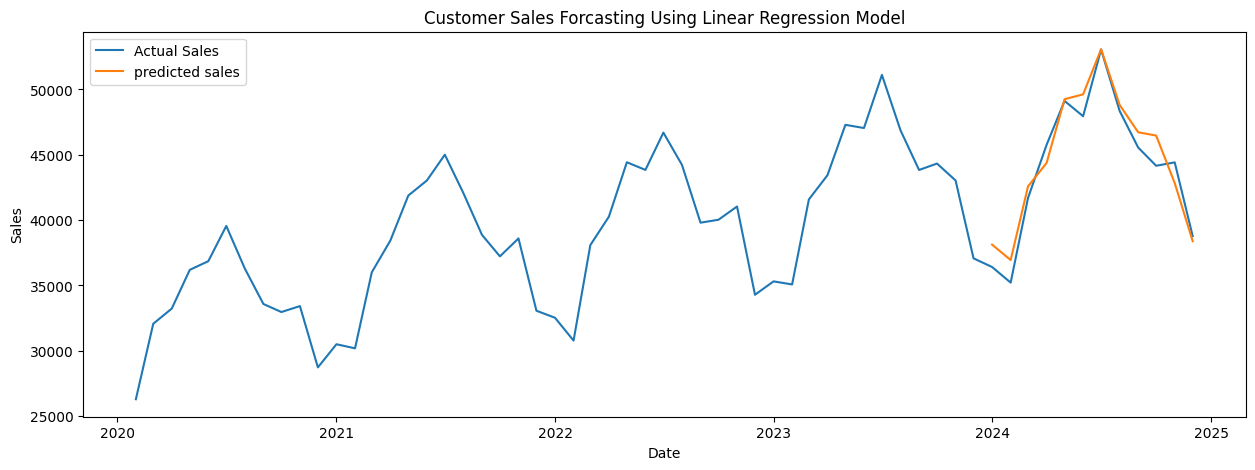

In [29]:
plt.figure(figsize=(15,5))
#Actual sales
plt.plot(monthly_sales['date'], monthly_sales['sales'])
#Predicted sales
plt.plot(predict_df['date'], predict_df['Linear Prediction'])
plt.title("Customer Sales Forcasting Using Linear Regression Model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(['Actual Sales', 'predicted sales'])
plt.show()